In [68]:
import sys; print('Python Version----', sys.version)
import numpy; print('Numpy Version----', numpy.__version__)
import scipy; print('SciPy Version----', scipy.__version__)
import sklearn; print('Scikit-learn Version----', sklearn.__version__)
import pandas; print('Pandas Version----', pandas.__version__)
import statsmodels; print('Statsmodels Version----', statsmodels.__version__ )
import pip; print('Pip Version----', pip.__version__)

Python Version---- 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy Version---- 1.19.2
SciPy Version---- 1.5.2
Scikit-learn Version---- 0.24.2
Pandas Version---- 1.1.3
Statsmodels Version---- 0.12.2
Pip Version---- 20.2.4


In [69]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
warnings.filterwarnings('ignore')


In [70]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [71]:
flight_data = sns.load_dataset('flights')
flight_data.head()
flight_data.tail()
flight_data.shape
flight_data.describe()
flight_data.info()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


(144, 3)

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [72]:
flight_data_pivot = flight_data.pivot('month', 'year', 'passengers')
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='month'>

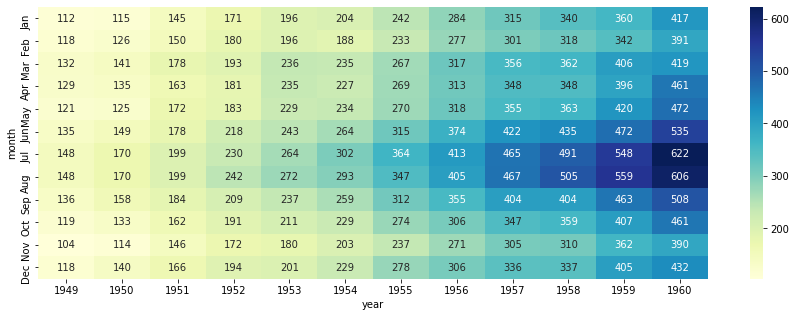

In [73]:
plt.figure(figsize=(15,5))
sns.heatmap(flight_data_pivot, annot=True, fmt='d', cmap='YlGnBu' )

In [74]:
month = pd.date_range('19490131', periods=144, freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [75]:
flight_data['datestamp'] = month
flight_data.head()

,year,month,passengers,datestamp
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [76]:
data = flight_data.loc[:, ('datestamp', 'passengers')]
data.head()
data.describe()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [77]:
data.set_index('datestamp', inplace=True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


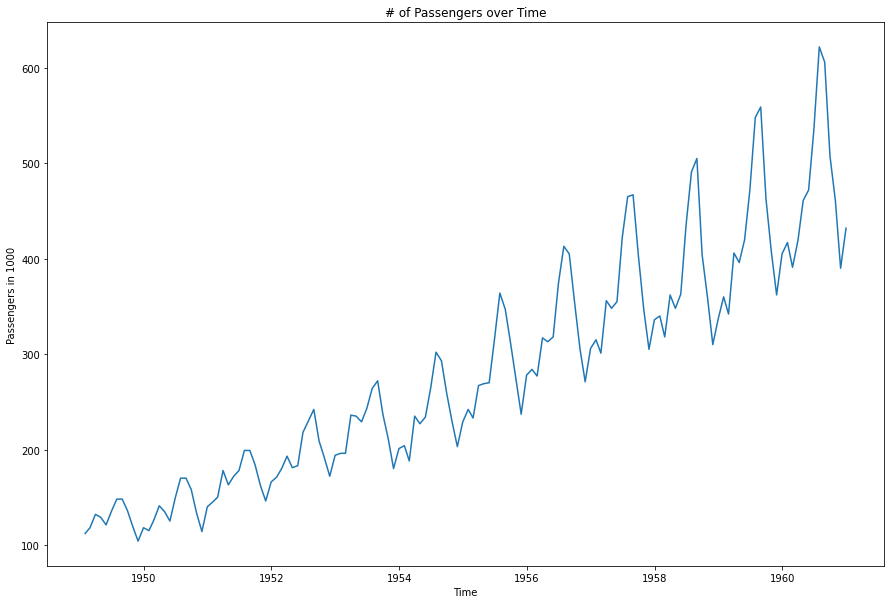

In [78]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000')
plt.title('# of Passengers over Time')
plt.show();

In [79]:
decomposition = seasonal_decompose(data, model='multiplicative')

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

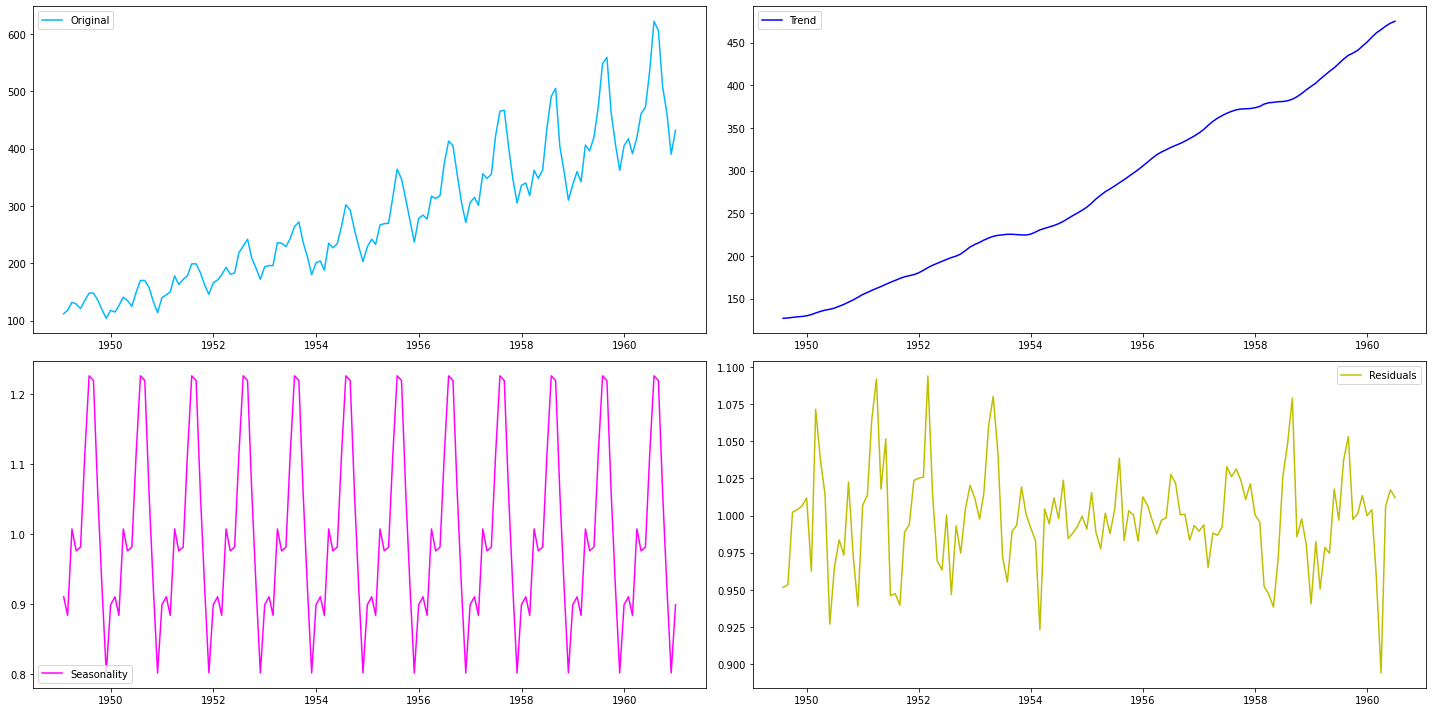

In [80]:
# plot trend of the series
plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data, color = '#00b8ff', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color='#ff00ff', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Plots above described:

Upper Left: The original data

Upper Right: The trend line

Lower Left: The seasonal decomposed data

Lower Right: The residual data

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

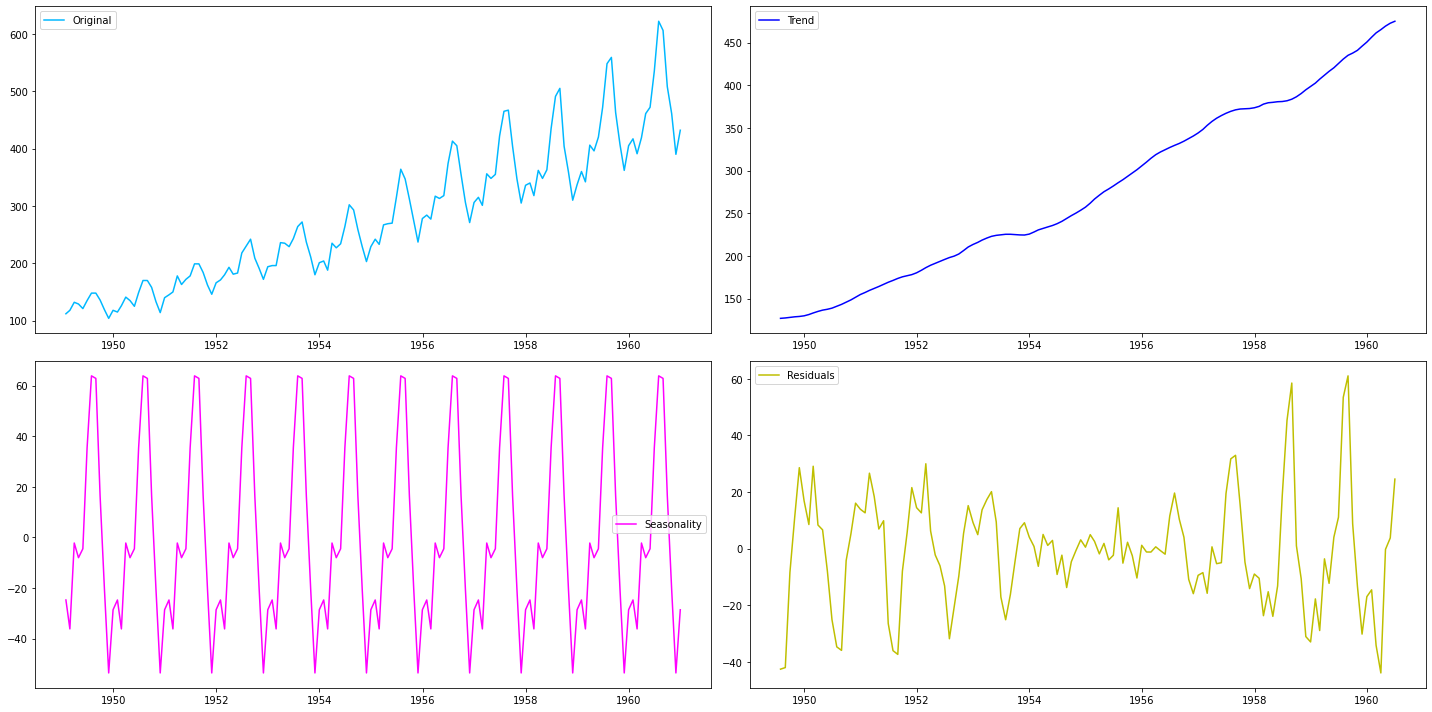

In [81]:
# plot using decomposition with additive model
decomposition = seasonal_decompose(data, model='additive')

# plot original, trend, decomposed seasonal, residuals
plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data, color = '#00b8ff', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color='#ff00ff', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [82]:
import pmdarima as pm
from pmdarima import model_selection

In [83]:
train = data[:100]
test = data[100:]

In [84]:
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                     suppres_warnings=True, maxiter=10,
                     seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=647.972, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.193, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=647.127, Time=0.42 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.06 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.09 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.994, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12] intercep

Text(0.5, 1.0, 'Actual test samples vs. forecasts')

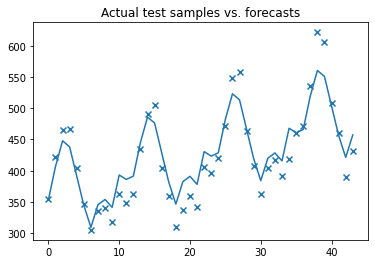

In [85]:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

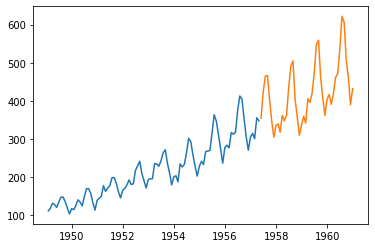

In [86]:
# view the training and test data continuously
plt.plot(train)
plt.plot(test)
plt.show();

In [87]:
# create an index of the test values for later
test_index = test.index

In [88]:
from pmdarima import model_selection

# run cross validation on the data
model1 = pm.ARIMA(order=(2, 1, 1))

cv = model_selection.SlidingWindowForecastCV(window_size=30,
                                            step=24,
                                            h=1)

model1_cv_scores = model_selection.cross_val_score(
    model1, train, scoring='smape', cv=cv, verbose=2
    )

print("Model 1 CV scores: {}".format(model1_cv_scores.tolist()))

# pick based on which has a lower mean error rate
m1_average_error = np.average(model1_cv_scores)

errors = m1_average_error
models = model1

# print out the answer

print("Lowest average SMAPE: {} (model{})".format(
    errors, model1))
print("Best model: {}".format(models))

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
Model 1 CV scores: [13.77856630930632, 8.9534655515264, 13.075958760623891]
Lowest average SMAPE: 11.93599687381887 (model ARIMA(2,1,1)(0,0,0)[0] intercept)
Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept


In [102]:
errors = []
models = []

for p in range(1, 8):
    for q in range(1, 8):
        # run cross validation on the data
        model1 = pm.ARIMA(order=(p, 1, q))

        cv = model_selection.SlidingWindowForecastCV(window_size=30,
                                            step=24,
                                            h=1)

        model1_cv_scores = model_selection.cross_val_score(
            model1, train, scoring='smape', cv=cv, verbose=2
            )

        m1_average_error = np.average(model1_cv_scores)
        
        errors.append(m1_average_error)
        models.append(model1)




[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] f

[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=0 ..........................................................
[CV] f

In [103]:
# find the index of the model with the lowest SMAPE value
best_model_index = errors.index(min(errors)) 

# print out the results of the best model
print('Best model: {}'.format(models[best_model_index]))
print('Lowest SMAPE: {}'.format(errors[best_model_index]))

Best model:  ARIMA(3,1,6)(0,0,0)[0] intercept
Lowest SMAPE: 7.152901206819934


In [104]:
# train the arima model
model = pm.auto_arima(train, start_p=1, start_q=1, start_P=0, start_Q=0,
                     max_p=8, max_q=8, max_P=8, max_Q=8, seasonal=True, m=12,
                     stepwise=True, suppress_warnings=True, D=1, max_D=1, d=1,
                     error_action='ignore', random_state=20, n_fits=30)

In [105]:
# make predictions
preds, conf_int = model.predict(n_periods=44, return_conf_int=True)


In [106]:
prediction = pd.DataFrame(preds, index = test_index )

prediction.columns = ['Predicted_Passengers']

In [107]:
prediction.shape
prediction.head()

(44, 1)

,Predicted_Passengers
datestamp,
1957-05-31,353.433649
1957-06-30,406.781321
1957-07-31,447.984392
1957-08-31,438.051605
1957-09-30,391.246543


In [108]:
from sklearn.metrics import mean_squared_error

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

Test RMSE: 26.206


<Figure size 1080x720 with 0 Axes>

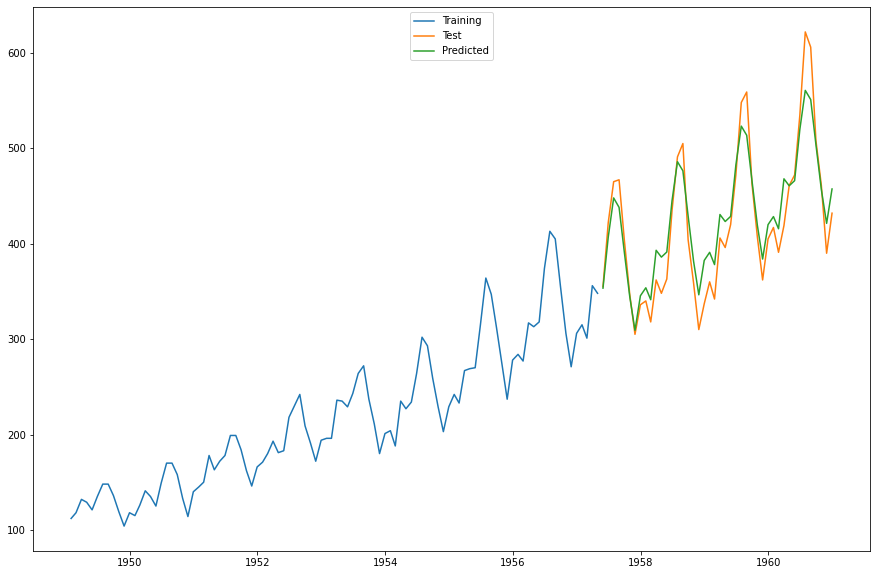

In [109]:
# Plot the forecast
plt.figure(figsize=(15,10))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [110]:
test_final = test.copy()
test_final['Predicted_Passengers'] = prediction
test_final['Error'] = test_final['passengers'] - test_final['Predicted_Passengers']
test_final.head()

,passengers,Predicted_Passengers,Error
datestamp,,,
1957-05-31,355,353.433649,1.566351
1957-06-30,422,406.781321,15.218679
1957-07-31,465,447.984392,17.015608
1957-08-31,467,438.051605,28.948395
1957-09-30,404,391.246543,12.753457


### Compute the Mean Absolute Error, Mean Squared Error, and Median Absolute Error

In [111]:
MAE = metrics.mean_absolute_error(test_final.passengers, test_final.Predicted_Passengers)
MSE = metrics.mean_squared_error(test_final.passengers, test_final.Predicted_Passengers)
median_ae = metrics.median_absolute_error(test_final.passengers, test_final.Predicted_Passengers)

In [112]:
print('Mean Absolute Error:', MAE)
print('\nMean Squared Error:', MSE)
print('\nMedian Absolute Error:', median_ae)

Mean Absolute Error: 21.53863130206145

Mean Squared Error: 686.7476370295576

Median Absolute Error: 22.334088597787712


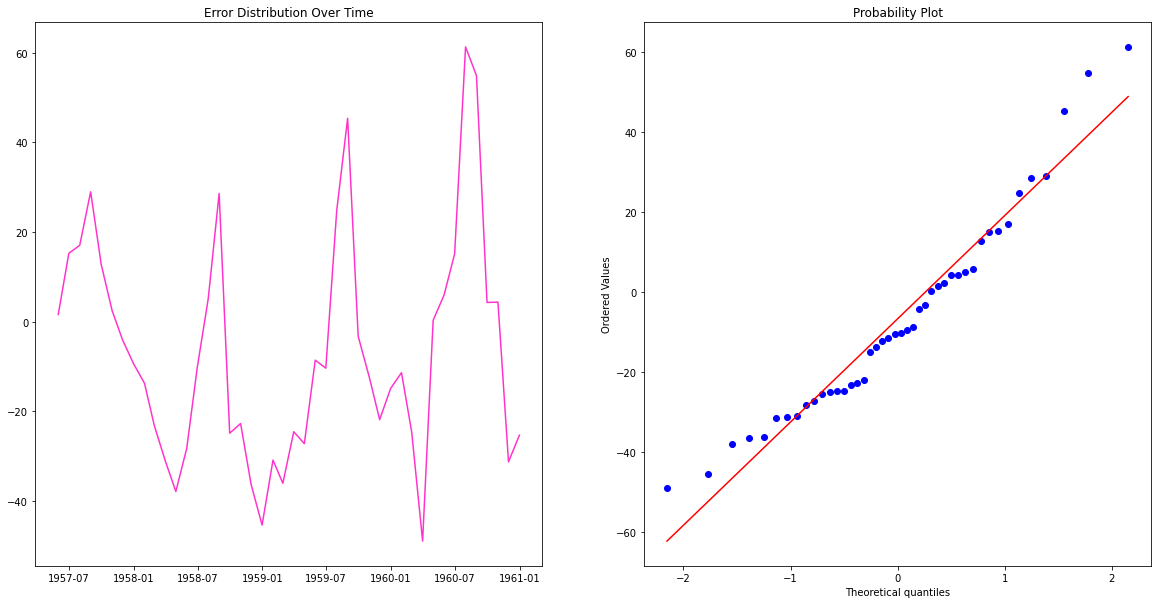

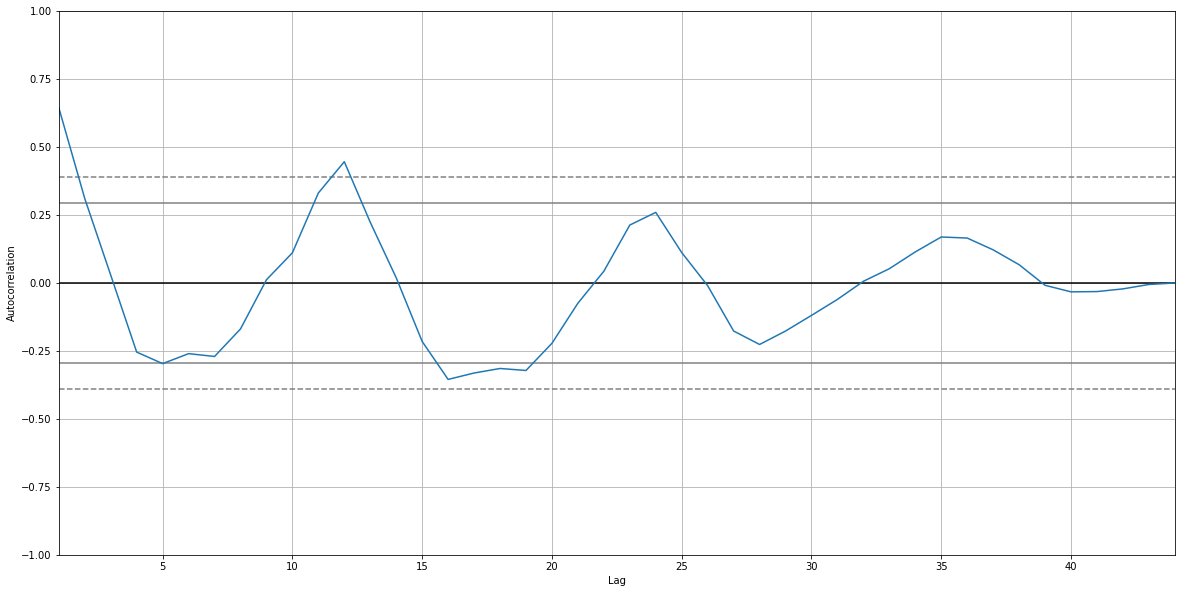

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(test_final.Error, color='#ff33CC')
plt.title('Error Distribution Over Time')
plt.subplot(122)
scipy.stats.probplot(test_final.Error, plot=plt)
plt.show;

plt.figure(figsize=(20,10))
pm.autocorr_plot(test_final.Error)
plt.show();

### Analysis of Autocorrelation and Lag:

There is definitely a period to the time series data and it looks like the peaks have an interval of 12 between them.